<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/aml_basis_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#Bayesian linear regression model
class BayesianModel:
    def __init__(self,M,alpha,beta):
        self.M      = M
        self.alpha  = alpha
        self.beta   = beta
        self.mean   = np.zeros(M)
        self.invcov = np.identity(M)/alpha # 공식에 맞게 변경

    def train(self,phi, y):
        self.phi = phi
        print('start train ...')
        invcov      = self.invcov + self.beta * phi.T @ phi
        cov         = np.linalg.inv(invcov)
        mean        = cov @ (self.invcov @ self.mean + self.beta * phi.T @ y)
        self.invcov = invcov
        self.mean   = mean
        print('phy :',np.array(phi).shape,'S**-1 :',np.array(invcov).shape,'mean :',np.array(mean).shape,'cov:',np.array(cov).shape)
        # matrix 를 바로 계산하기 위해 return mean 추가
        return self
    def predict(self,phi):
        #print('predict phi*mean:',np.array(phi).shape, np.array(self.mean).shape)
        y_pred_mean = phi @ self.mean
        cov         = np.linalg.inv(self.invcov)
        #y_pred_var  = 1/self.beta + phi.T @ cov @ phi
        y_pred_var  = 1/self.beta + phi @ cov @ phi.T
        return y_pred_mean,np.diag(y_pred_var)
    def kernel(self,phi,y):
        yk = 0
        for i in range(phi.shape[0]):
            yk += self.beta*phi @ np.linalg.inv(self.invcov) @ self.phi[i,:].T * y[i]
        return yk
    def loss_abs(self,y, ypred):
        return sum(abs(y - ypred))
    def evidence(self,y):
        N, M    = self.phi.shape
        EM2     = self.beta*np.sum((y-self.phi @ self.mean)**2) + self.alpha*np.sum(self.mean**2)
        logdetA = np.linalg.slogdet(self.invcov)[1]
        evid2   = M*np.log(self.alpha) + N*np.log(self.beta/2) - 2*EM2 - logdetA - N*np.log(np.pi*2)
        return evid2/2
    @property
    def weights(self):
        cov = np.linalg.inv(self.invcov)
        return self.mean, cov

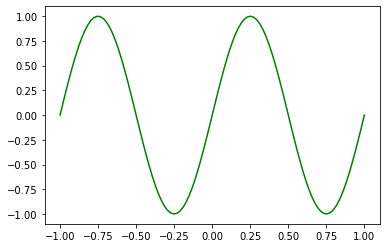

In [47]:
# Create sample data
num=100
X = np.linspace(-1,1,num).reshape(100,1)
Y = np.sin(2*np.pi*X)
plt.plot(X,Y,'g-')

**1. Polynomimal basis functions**

> The polynomial basis function can be described as follow:

> $\phi(x)=\sum_{j=0}^{M}{x^{j}}$

> Where M: highest degree of polinomial function.

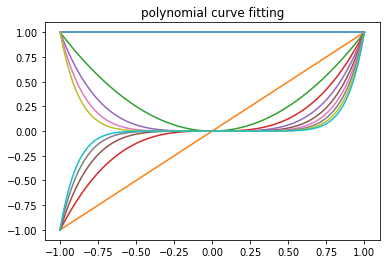

In [48]:
# Polynomial curve fitting
num=100
i=9
X = np.linspace(-1,1,num).reshape(100,1)

M=9
for i in range(M+1):
  y = X**i
  plt.plot(X,y)
  plt.title('polynomial curve fitting')

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def phi_poly(degree,X):
    #Polynomial functions
    #Return assembled design matrix phi
    N,k = X.shape
    phi = np.ones((N, degree * k + 1))
    print('## start phi_poly() ....')
    for i in range(N):
        for j in range(degree):
            phi[i,j*k:(j+1)*k] = X[i, :]**(j+1)
            '''
            if i % 1000 == 0 :
              print(i,j*k,(j+1)*k,phi[i,j*k:(j+1)*k].shape)
            '''
    return phi

## start phi_poly() ....
start train ...
phy : (100, 2) S**-1 : (2, 2) mean : (2, 2) cov: (2, 2)
loss : 56.20124525903874
## start phi_poly() ....
start train ...
phy : (100, 3) S**-1 : (3, 3) mean : (3, 3) cov: (3, 3)
loss : 56.20124525903875
## start phi_poly() ....
start train ...
phy : (100, 4) S**-1 : (4, 4) mean : (4, 4) cov: (4, 4)
loss : 54.00444284303914
## start phi_poly() ....
start train ...
phy : (100, 5) S**-1 : (5, 5) mean : (5, 5) cov: (5, 5)
loss : 54.00444284303913
## start phi_poly() ....
start train ...
phy : (100, 6) S**-1 : (6, 6) mean : (6, 6) cov: (6, 6)
loss : 22.884349181335725
## start phi_poly() ....
start train ...
phy : (100, 7) S**-1 : (7, 7) mean : (7, 7) cov: (7, 7)
loss : 22.88434918133572
## start phi_poly() ....
start train ...
phy : (100, 8) S**-1 : (8, 8) mean : (8, 8) cov: (8, 8)
loss : 25.057825211174784
## start phi_poly() ....
start train ...
phy : (100, 9) S**-1 : (9, 9) mean : (9, 9) cov: (9, 9)
loss : 25.057825211174794
## start phi_poly() .

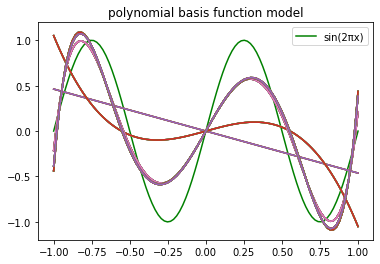

In [50]:
N,k     = X.shape
num=100
X = np.linspace(-1,1,num).reshape(100,1)
Y = np.sin(2*np.pi*X)
y=Y[:]
plt.plot(X,y,'g-',label='sin(2πx)')
plt.title('polynomial basis function model')
alpha,beta =[2.,25]
loss=[]
evidence=[]
y_pred=np.zeros(N)
maxdegree = 10
for degree in range(1,maxdegree+1):
    phi=phi_poly(degree,X)
    #phi=phi_tanh(degree,X)
    M     = phi.shape[1]
    model = BayesianModel(M,alpha,beta)
    model.train(phi,y)
    #print('predict phi*mean:',np.array(phi).shape, np.array(mean).shape)
    y_pred,y_pred_var=model.predict(phi) #phi@mean
    '''
    for i in range(N):
        y_pred[i]=model.predict(phi[i,:])[0]
    '''    
    #print('y_pred :',np.array(y_pred).shape)
    loss.append(model.loss_abs(y,y_pred))
    print('loss :',np.min(loss[-1:]))
    evidence.append(model.evidence(y))
    plt.plot(X,y_pred)
    plt.legend()

**2. Gaussian's basis functions**

> The Gaussian's basis function can be described as follow:

> $\phi_{i}(x)=e^{\frac{(x-\mu_{i})}{2s^{2}}}$

> Where $\mu$: govern the locations of the basis functions; s: govern their spatial scale. 

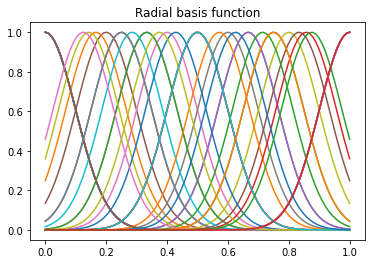

In [51]:
#Radial Basis Function(RBF)
num=100
i=9
X = np.linspace(0,1,num).reshape(100,1)

M=9
for interval in range(2,M+1):
  #print(interval)
  for j in range(interval):
    #print(j,interval-1)
    y = np.exp(-(X - j/(interval-1)) ** 2 / (2 * 0.1 ** 2))
    plt.plot(X,y)
    plt.title('Radial basis function')

In [52]:
X.shape

(100, 1)

In [53]:
def phi_gauss(interval,X):
  #Gauusian's basis function
  #Return assembled design matrix phi
    N, k = X.shape
    phi = np.ones((N, interval*k + 1))
    for i in range(N):
        for j in range(interval):
            phi[i,j*k:(j+1)*k] = np.exp(-(X[i, :] - j/(interval-1)) ** 2 / (2 * 0.2 ** 2))
    return phi

degree:  2 3
start train ...
phy : (100, 3) S**-1 : (3, 3) mean : (3, 3) cov: (3, 3)
loss : 53.19133901045316
degree:  3 4
start train ...
phy : (100, 4) S**-1 : (4, 4) mean : (4, 4) cov: (4, 4)
loss : 53.19133901045315
degree:  4 5
start train ...
phy : (100, 5) S**-1 : (5, 5) mean : (5, 5) cov: (5, 5)
loss : 40.645731605399426
degree:  5 6
start train ...
phy : (100, 6) S**-1 : (6, 6) mean : (6, 6) cov: (6, 6)
loss : 43.61761300433983
degree:  6 7
start train ...
phy : (100, 7) S**-1 : (7, 7) mean : (7, 7) cov: (7, 7)
loss : 10.341450313064806
degree:  7 8
start train ...
phy : (100, 8) S**-1 : (8, 8) mean : (8, 8) cov: (8, 8)
loss : 10.192455348678775


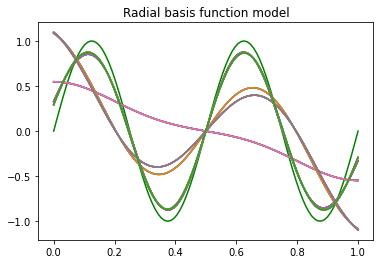

In [54]:
#y=Y[:,0]
y=Y[:]
plt.plot(X,y,'g-',label='sin(2πx)')
plt.title('Radial basis function model')
loss=[]
evidence=[]
N,k= X.shape
maxdegree = 7
for degree in range(2,maxdegree+1):
    phi=phi_gauss(degree,X)
    #phi=phi_tanh(degree,X)
    M     = phi.shape[1]
    print('degree: ',degree,M)
    model = BayesianModel(M,alpha,beta)
    model.train(phi,y)
    y_pred,y_pred_var=model.predict(phi)
    '''
    for i in range(N):
        y_pred[i]=model.predict(phi[i,:])[0]
    '''
    loss.append(model.loss_abs(y,y_pred))
    print('loss :',np.min(loss[-1:]))
    evidence.append(model.evidence(y))
    plt.plot(X,y_pred)

**3. Trigonometric basis functions**

> The trigonometric basis function can be described as follow:

> $\phi(x)=\sum_{j=0}^{M}{sin(x)^{j}+cos(x)^{j}}$

> Where M: highest degree of trigometric function.

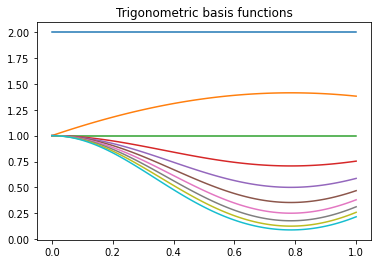

In [67]:
#Trigonometric Basis Function(RBF)
num=100
i=9
X = np.linspace(0,1,num).reshape(100,1)
M=9
for i in range(M+1):
  y = np.sin(X)**i+np.cos(X)**i
  plt.plot(X,y)
  plt.title('Trigonometric basis functions')

In [64]:
def phi_trigo(degree,X):
    #Trigonometric functions
    #Return assembled design matrix phi
    N, k = X.shape
    phi = np.ones((N, 2*degree * k + 1))
    for i in range(N):
        for j in range(degree):
            phi[i,j*k         :         (j+1)*k] = np.sin(X[i,:])**(j+1)
            phi[i,j*k+degree*k:(j+1)*k+degree*k] = np.cos(X[i,:])**(j+1)
    return phi

start train ...
phy : (100, 3) S**-1 : (3, 3) mean : (3, 3) cov: (3, 3)
loss : 56.313098699776994
start train ...
phy : (100, 5) S**-1 : (5, 5) mean : (5, 5) cov: (5, 5)
loss : 56.28877213781811
start train ...
phy : (100, 7) S**-1 : (7, 7) mean : (7, 7) cov: (7, 7)
loss : 55.37983013158475
start train ...
phy : (100, 9) S**-1 : (9, 9) mean : (9, 9) cov: (9, 9)
loss : 54.09491562862774
start train ...
phy : (100, 11) S**-1 : (11, 11) mean : (11, 11) cov: (11, 11)
loss : 53.37050410105194
start train ...
phy : (100, 13) S**-1 : (13, 13) mean : (13, 13) cov: (13, 13)
loss : 53.20077961156303
start train ...
phy : (100, 15) S**-1 : (15, 15) mean : (15, 15) cov: (15, 15)
loss : 53.235316577882465


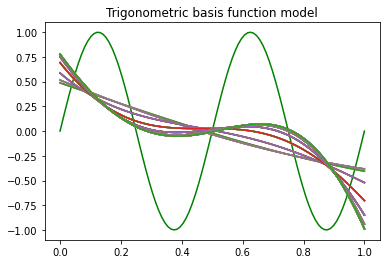

In [65]:
loss=[]
evidence=[]
N,k = X.shape
y=Y[:]
plt.plot(X,y,'g-',label='sin(2πx)')
plt.title('Trigonometric basis function model')
maxdegree = 7
for degree in range(1,maxdegree+1):
    phi=phi_trigo(degree,X)
    #phi=phi_tanh(degree,X)
    M     = phi.shape[1]
    model = BayesianModel(M,alpha,beta)
    model.train(phi,y)
    y_pred,y_pred_var=model.predict(phi)
    '''
    for i in range(N):
        y_pred[i]=model.predict(phi[i,:])[0]
    '''
    loss.append(model.loss_abs(y,y_pred))
    print('loss :',np.min(loss[-1:]))
    evidence.append(model.evidence(y))
    plt.plot(X,y_pred)
    

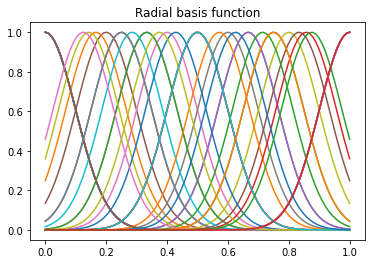

In [ ]:
#Radial Basis Function(RBF)
num=100
i=9
X = np.linspace(0,1,num).reshape(100,1)

M=9
for interval in range(2,M+1):
  #print(interval)
  for j in range(interval):
    #print(j,interval-1)
    y = np.exp(-(X - j/(interval-1)) ** 2 / (2 * 0.1 ** 2))
    plt.plot(X,y)
    plt.title('Radial basis function')